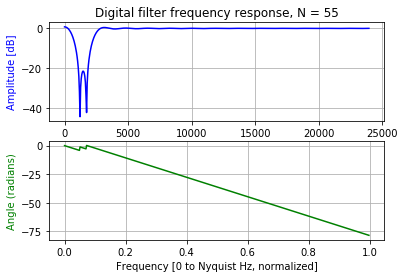

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Your filter design here
# firls() can be called via signal.firls()
fs = 48000
nyq = 24000
bands = [0, 500, 1000, 2000, 2500, 24000]
desired = [1, 1, 0, 0, 1, 1]

b = signal.firls(55, bands, desired, nyq = nyq)

# Signal analysis
w, h = signal.freqz(b)

plt.figure()
plt.subplot(2,1,1)
plt.title('Digital filter frequency response, N = ' + str(len(b)))

#see the magnitude

plt.plot(w / np.pi*nyq, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.grid()
plt.axis('tight')
plt.subplot(2,1,2)
angles = np.unwrap(np.angle(h))
plt.plot(w / np.pi, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.xlabel('Frequency [0 to Nyquist Hz, normalized]')
plt.show()


In [3]:
#Question: computational complexity and resources
#

In [5]:
F_s = 48000
t = [i / F_s for i in range(2 * F_s)]

test_data = signal.chirp(t, 1, t[-1], 24000, method='logarithmic')
test_freq = np.fft.fft(test_data)
# plt.plot(abs(test_freq))         
# plt.show()
# ... filter ...

result= np.zeros(len(b)+len(test_data)-1)

for i in range(len(b)+len(test_data)-1):
    for j in range(len(b)):
        if((i-j)<len(test_data)):
            result[i] += test_data[i-j]*b[j]


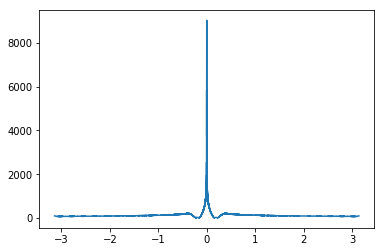

In [6]:
            
from math import log10
from math import pi

# result = signal.convolve(test_data, b)
data_fft = np.fft.fft(result)
data_fft = np.fft.fftshift(data_fft)

freq_fft = list(range(0,len(data_fft)))
freq_fft_rad = [i/len(data_fft)*2*pi for i in freq_fft]
freq_fft_rad = np.fft.fftshift(freq_fft_rad)
for i in range(0,len(freq_fft_rad)//2):
    freq_fft_rad[i] = freq_fft_rad[i] - 2*pi

plt.plot(freq_fft_rad, abs(data_fft))
plt.title("Filtered Signal after Manual Convolution")
plt.show()





In [7]:
a = [1, 2, 3, 4, 5, 6]
coef_str = "float coefs[] = {" 
for val in a: 
    coef_str += str(val) + ", " 
coef_str = coef_str[:-2] 
coef_str += "};" 
print(coef_str) 

float coefs[] = {1, 2, 3, 4, 5, 6};
